In [1]:
%matplotlib inline
import pandas as pd
#import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans,DBSCAN
from sklearn.mixture import GaussianMixture
import seaborn as sns

### Cargar datos y seleccionar los que tiene información

In [7]:
dictCategoria={0:'waterway',1:'tourism',2:'telecom',3:'sport',4:'shop',5:'route',6:'railway',7:'public_transport',8:'power',9:'place',10:'office',11:'natural',12:'military',13:'man_made',14:'leisure',15:'landuse',16:'historic',17:'highway',18:'geological',19:'emergency',20:'craft',21:'building',22:'boundary',23:'barrier',24:'amenity',25:'aeroway',26:'aerialway'}
df=pd.read_csv("datos_clustering.csv")
suma=df.sum()
desviacion=df.std()

iDes=np.array(desviacion.index[desviacion>0.05])
iSum=np.array(suma.index[suma>1])
iR=np.intersect1d(iDes,iSum)
matriz2=df[iR].to_numpy()
#############################3
#iR=['44', '460', '480', '483', '584', '588', '591', '665', '669', '672']
############################
matriz=df[iR].to_numpy()
print(matriz)
# de fial a columna
print(iR)
for i in iR:
    print("va de ",dictCategoria[int((int(i)+1)/27)],"a",dictCategoria[((int(i)) % 27)])

[[0.         0.         0.13636364 ... 0.09090909 0.09090909 0.13636364]
 [0.         0.         0.55555556 ... 0.         0.11111111 0.        ]
 [0.         0.         0.5        ... 0.20454545 0.         0.09090909]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
['44' '460' '476' '480' '483' '584' '588' '591' '665' '669' '672']
va de  tourism a highway
va de  highway a tourism
va de  highway a highway
va de  highway a building
va de  highway a amenity
va de  building a highway
va de  building a building
va de  building a amenity
va de  amenity a highway
va de  amenity a building
va de  amenity a amenity


### Probar PCA con 2 dimensiones

[0.63800251 0.10589976 0.08419329 0.04790904 0.04293867]


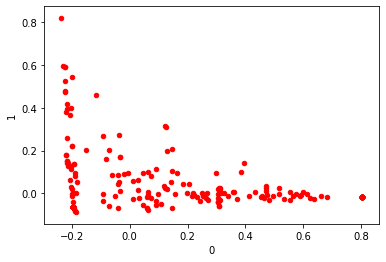

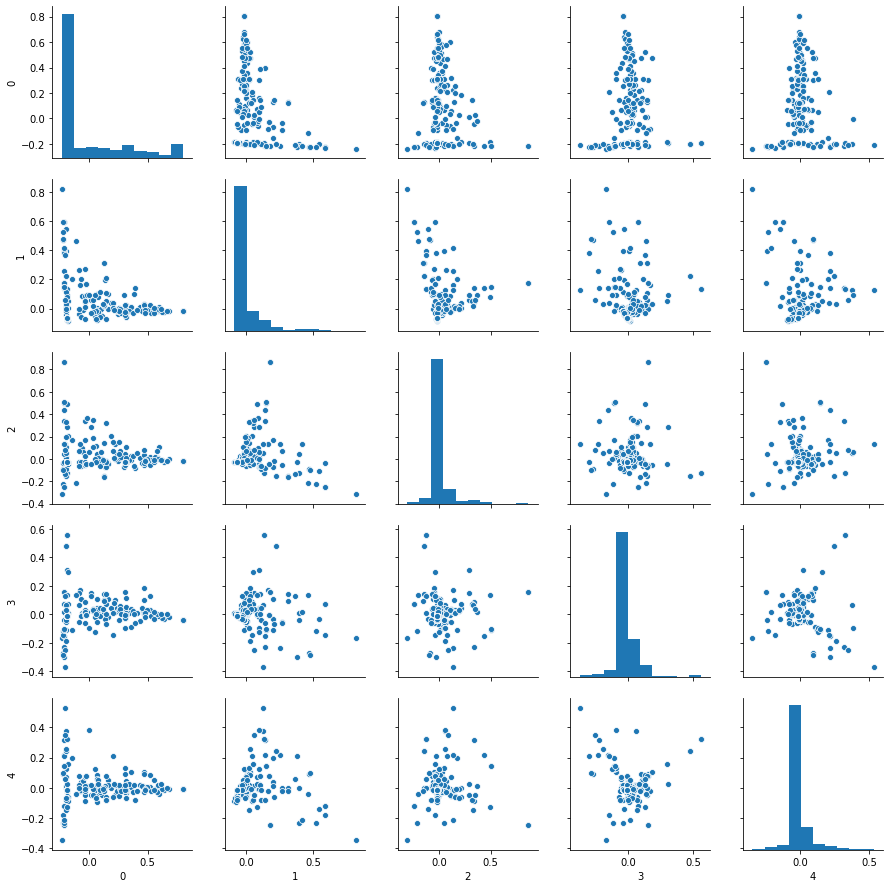

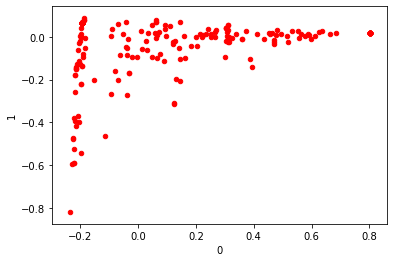

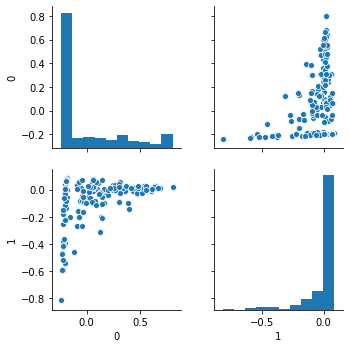

In [8]:
pca=PCA(n_components=5)
rPCA=pd.DataFrame(pca.fit_transform(matriz2))
rPCA.plot.scatter(0,1,c='red')
sns.pairplot(rPCA)
print(pca.explained_variance_ratio_)

kpca=KernelPCA(n_components=2)
rKPCA=pd.DataFrame(kpca.fit_transform(matriz))
rKPCA.plot.scatter(0,1,c='red')
sns.pairplot(rKPCA)



### KMeans

[0 2 2 2 0 0 0 0 0 0 1 0 0 1 2 0 0 1 2 0 0 0 2 1 1 2 2 0 0 0 0 0 0 2 1 0 2
 2 0 1 0 1 1 2 2 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 2 0 0 2 1 1 2 0 1 2 0 2
 0 0 0 0 1 0 0 1 2 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 2 0 0 1 0 0 0 2 0 0 2 2 2 0 2 0 2 0 0 0 1 0 0 0 0 2 0 0 1 0 1 0 2 0 0 0
 0 0 0 0 0 2 0 0 1 0 0 1 0 0 0 2 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 1 2 2 2 0
 2 0 0 0 0 0 1 0 2 2 0 1 0 2 1 1 2 0 2 1 2 0 1 0 1 0 2 0 0 0 1 2 2 2 0 2 0
 1 2 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 2 2 1 1 1 0 0 2 0 2 0 0 0 0
 0 0 0 0 2 0 2 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 2 0 1 0 2 0 0 0 0 2 2 1 0 1 2 0 0 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 0 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[7.46093398e-03 6.05232441e-03 1.14579919e-02 1.77864533e-02
  8.51007647e-03 1.87515784e-02 4.11465997e-02 2.31709275e-02
  9.47425195e-03 2.08722854e-02 3.38371330e-02]
 [5.88967944e-03 5.17179587e-03 8.60978778e-01 1.12884079e-02
  2.16773535e-02 2.03968573e-02

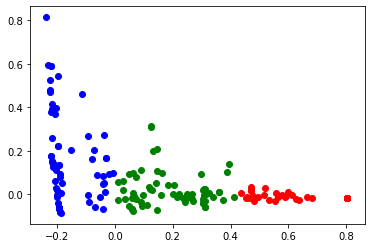

In [12]:
kmeans=KMeans(n_clusters=3)
lKmeans=kmeans.fit_predict(matriz)
print(lKmeans)
dfKmeans=pd.DataFrame(lKmeans)
df1=dfKmeans[dfKmeans[0]==1]
df0=dfKmeans[dfKmeans[0]==0]
df2=dfKmeans[dfKmeans[0]==2]
df3=dfKmeans[dfKmeans[0]==3]
dfKmeans.reindex()

df1=rPCA.loc[df1.index]
df0=rPCA.loc[df0.index]
df2=rPCA.loc[df2.index]
df3=rPCA.loc[df3.index] 

plt.scatter(df1[0], df1[1], c="red")
plt.scatter(df0[0], df0[1], c="blue")
plt.scatter(df2[0], df2[1], c="green")
plt.scatter(df3[0], df3[1], c="black")
l=["Azul","Rojo","Verde"]
print(kmeans.cluster_centers_)
for k,j in enumerate(kmeans.cluster_centers_):
    print("CLUSTER",k,l[k])
    for c,i in enumerate(iR):
        print("va de ",dictCategoria[int((int(i)+1)/27)],"a",dictCategoria[((int(i)) % 27)],"el",round(j[c]*100,3),"% de las veces")

#pd.DataFrame(rPCA)[list(dfKmeans.index[dfKmeans==1])].plot.scatter(0,1,c='red')

### DBSCAN

[-1 -1 -1 -1 -1 -1  0 -1 -1 -1  1  0 -1  2 -1 -1 -1  1 -1  0 -1 -1 -1 -1
  1 -1 -1  0  0  0 -1  0 -1 -1  1 -1 -1 -1 -1  1  0  1  1 -1 -1  0  0  0
  0  0 -1  2 -1  0  0 -1 -1  0  0  0  0  0 -1 -1 -1 -1 -1  2 -1  0  2 -1
  0 -1  0 -1  0  0  2  0  0  2 -1 -1 -1 -1  0  0  0  0  0  0 -1  0  0  1
 -1  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0  2  0  0  0 -1
  0  0 -1 -1  3 -1 -1 -1  3  0 -1 -1  2  0  0  0 -1  3  0  0 -1  0  2  0
  3 -1  0  0  0  0  0  0  0  3  0  0  2  0  0 -1  0  0  0  3  0  0  0 -1
 -1  0  0  0 -1  0 -1  0  0  0  0 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1  2  0 -1  2  2 -1  0  3 -1  3 -1  2  0  2 -1 -1  0  0  0  2
 -1 -1 -1 -1  1 -1  1 -1  0 -1  0  0  0  0  0 -1  0 -1  0  2 -1  0  0 -1
 -1  0 -1  0  0 -1 -1  2  1  1  0  0 -1  0 -1  0 -1  0  0 -1  0  0  0 -1
 -1 -1 -1  0  0  0  2  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1 -1  0  0  0  0  0  0  1  0  0  2  0  0  0  1  0  1  0 -1
  3  0  2  0 -1  0  0  0  0 -1 -1  2 -1  1 -1  0  0

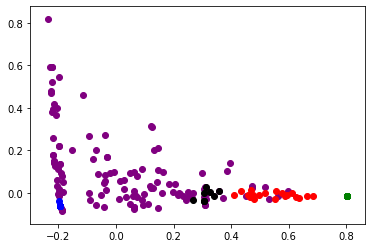

In [10]:
dbscan=DBSCAN(eps=0.1)
lKmeans=dbscan.fit_predict(matriz)

print(lKmeans)
dfKmeans=pd.DataFrame(lKmeans)
dfx=dfKmeans[dfKmeans[0]==-1]
df1=dfKmeans[dfKmeans[0]==1]
df0=dfKmeans[dfKmeans[0]==0]
df2=dfKmeans[dfKmeans[0]==2]
df3=dfKmeans[dfKmeans[0]==3]
dfKmeans.reindex()

dfx=rPCA.loc[dfx.index]
df1=rPCA.loc[df1.index]
df0=rPCA.loc[df0.index]
df2=rPCA.loc[df2.index]
df3=rPCA.loc[df3.index]

plt.scatter(dfx[0], dfx[1], c="purple")
plt.scatter(df1[0], df1[1], c="red")
plt.scatter(df0[0], df0[1], c="blue")
plt.scatter(df2[0], df2[1], c="green")
plt.scatter(df3[0], df3[1], c="black")

### GaussianMixture

[2 2 1 2 2 2 0 1 2 2 1 0 2 1 1 1 2 2 2 0 0 2 1 1 2 2 1 0 0 0 2 0 1 1 2 2 1
 2 2 1 2 2 1 1 1 0 0 0 0 0 2 1 2 0 0 2 0 0 0 0 0 0 2 0 0 2 1 1 2 0 1 2 0 2
 0 2 0 0 1 0 0 1 1 0 2 2 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 2 0 0 1 0 0 0 2 0 0 2 2 1 2 2 2 2 0 0 0 1 0 0 0 2 1 0 0 2 0 1 0 2 2 0 0
 0 0 0 0 0 2 0 0 1 0 0 1 0 0 0 2 0 0 0 2 2 0 0 0 1 0 0 0 0 0 0 0 1 2 2 2 2
 2 2 0 2 0 0 1 2 1 2 2 1 0 1 1 1 2 0 2 2 1 2 1 0 1 0 2 0 0 0 1 1 1 2 2 1 2
 1 1 0 2 0 0 0 0 0 2 0 2 0 1 2 0 0 2 2 0 2 0 0 2 2 1 2 1 0 0 2 0 2 0 2 0 0
 0 0 0 0 2 1 2 2 0 0 0 1 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 2 0 0 1 0 1 0 1 0 0 0 0 2 1 1 0 2 2 0 0 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 0 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


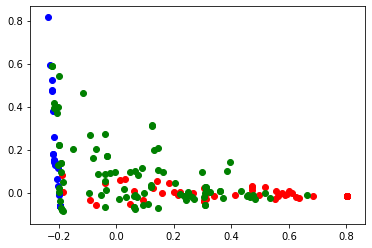

In [11]:
gm=GaussianMixture(n_components=3)
lKmeans=gm.fit_predict(matriz)

dfKmeans=pd.DataFrame(lKmeans)
df1=dfKmeans[dfKmeans[0]==1]
df0=dfKmeans[dfKmeans[0]==0]
df2=dfKmeans[dfKmeans[0]==2]
df3=dfKmeans[dfKmeans[0]==3]
dfKmeans.reindex()

df1=rPCA.loc[df1.index]
df0=rPCA.loc[df0.index]
df2=rPCA.loc[df2.index]
df3=rPCA.loc[df3.index]

plt.scatter(df1[0], df1[1], c="red")
plt.scatter(df0[0], df0[1], c="blue")
plt.scatter(df2[0], df2[1], c="green")
plt.scatter(df3[0], df3[1], c="black")
print(lKmeans)